<a href="https://colab.research.google.com/github/OleksandrDoskalchuk/hello-world/blob/main/Vodafone_Music_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/competitions/aibooster-vodafone-music-challenge/data - завдання

https://docs.google.com/spreadsheets/d/1N6BgUQv-tKGCKVYUfIzYvKTkS8ll2DPG/edit?usp=sharing&ouid=102801624385657361897&rtpof=true&sd=true - пояснення для колонок

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = "/content/drive/MyDrive/main academy/датасеты/vodafone_music_subset.csv"
df = pd.read_csv(path)
df.head(5)

device_type  manufacturer_category  os_category  sim_count  tp_flag  \
0            7                   1057            3        2.0        0   
1            7                    728            3        1.0        0   
2            7                    896           26        1.0        0   
3            7                    745            3        2.0        0   
4            7                     69           27        1.0        1   

         lt  block_flag  days_exp  service_1_flag  service_1_count  ...  \
0  0.965306           0     153.0             0.0              0.0  ...   
1  0.964468           0     354.0             0.0              0.0  ...   
2  0.646706           0      60.0             0.0              0.0  ...   
3  0.842123           0     252.0             1.0             22.0  ...   
4  0.988695           0     333.0             0.0              0.0  ...   

   service_6_count_m3  service_7_cost_m3  service_7_flag_m3  \
0                 0.0                0.0                0.0   
1                 0.0                0.0                0.0   
2                 0.0                0.0                0.0   
3                 0.0                0.0                0.0   
4                 0.0                0.0                0.0   

   service_8_count_m3  income_brnd_cont_m3  data_type_1_m3  data_type_2_m3  \
0                 0.0                  NaN             NaN             NaN   
1                 0.0                  NaN             NaN             NaN   
2                 0.0                  NaN             NaN             NaN   
3                 0.0                  NaN             NaN     3104.715068   
4                 0.0                  NaN             NaN        0.822502   

   data_type_3_m3  service_9_flag_m3  target  
0       48.779990                NaN       0  
1             NaN                NaN       0  
2             NaN                NaN       0  
3     2890.028280                NaN       1  
4       41.871067                NaN       0  

[5 rows x 460 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17500 entries, 0 to 17499
Columns: 460 entries, device_type to target
dtypes: float64(452), int64(8)
memory usage: 61.4 MB


17500 абонентів та 460 ознак(включаючи цільову групу)


# Data Cleaning(обробка та 'чистка' даних)

In [ ]:
mis_val = df.isnull().sum()

In [ ]:
mis_val_percent = 100 * df.isnull().sum() / len(df)

In [ ]:
mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)


таблиця з кількістю пропущених значень та їх % по кожній колонці

In [ ]:
mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
mis_val_table_ren_columns
#присвоїв імена колонкам для розуміння

Missing Values  % of Total Values
device_type                         0           0.000000
manufacturer_category               0           0.000000
os_category                         0           0.000000
sim_count                         176           1.005714
tp_flag                             0           0.000000
...                               ...                ...
data_type_1_m3                  15542          88.811429
data_type_2_m3                   6394          36.537143
data_type_3_m3                   4994          28.537143
service_9_flag_m3               16586          94.777143
target                              0           0.000000

[460 rows x 2 columns]

In [ ]:
mis_val_table_ren_columns = mis_val_table_ren_columns.sort_values('% of Total Values', ascending=False).round(1)
mis_data = mis_val_table_ren_columns


відсортував таблицю по спаданню %

In [ ]:
mis_data.head(20)

Missing Values  % of Total Values
count_url_category_13           17379               99.3
count_url_category_15           17297               98.8
vol_app_3                       17291               98.8
count_app_3                     17291               98.8
count_url_category_12           17184               98.2
vol_app_11                      17128               97.9
count_app_11                    17128               97.9
count_app_13                    17039               97.4
vol_app_13                      17039               97.4
count_url_category_1            17016               97.2
count_gift_type_4               16977               97.0
rr_gift_type_4                  16977               97.0
vol_app_16                      16941               96.8
count_app_16                    16941               96.8
count_app_14                    16861               96.3
vol_app_14                      16861               96.3
count_url_category_11           16631               95.0
service_9_flag_m3               16586               94.8
service_9_flag_m1               16576               94.7
service_9_flag_m2               16544               94.5

In [ ]:
missing_columns = list(mis_data[mis_data['% of Total Values'] > 70].index)
print(missing_columns)


['count_url_category_13', 'count_url_category_15', 'vol_app_3', 'count_app_3', 'count_url_category_12', 'vol_app_11', 'count_app_11', 'count_app_13', 'vol_app_13', 'count_url_category_1', 'count_gift_type_4', 'rr_gift_type_4', 'vol_app_16', 'count_app_16', 'count_app_14', 'vol_app_14', 'count_url_category_11', 'service_9_flag_m3', 'service_9_flag_m1', 'service_9_flag_m2', 'count_url_category_6', 'count_url_category_8', 'count_url_category_3', 'count_url_category_4', 'data_type_1_m3', 'count_app_2', 'vol_app_2', 'vol_app_8', 'count_app_8', 'income_brnd_cont_m2', 'income_brnd_cont_m1', 'count_url_category_9', 'data_type_1_m2', 'income_brnd_cont_m3', 'count_url_category_7', 'vol_app_6', 'count_app_6', 'data_type_1_m1', 'vol_app_15', 'count_app_15', 'count_url_category_10', 'count_app_9', 'vol_app_9', 'vol_app_12', 'count_app_12']


всі колонки, в яких пропущено більше 70% значень додав у список missing_columns

In [ ]:
print(len(missing_columns)) #вийшло 45 колонок з 460

45


In [ ]:
df = df.drop(missing_columns, axis = 1)

видалив 45 колонок з датафрейму, в яких відсутні більше 70% даних.Це рішення було прийнято для того, щоб якомога менше заповнювати дані та впливати на результат навчання моделі

In [ ]:
df = df.fillna(df.median())


заповнив всі пропущені дані, що залишились медіанами значень по кожній колонці

In [ ]:
zero_columns = df.loc[:, (df == 0).all()]
zero_columns.head(3)

rr_act_type_7  rr_gift_type_1  voice_omo_in_cost_m1  voice_pstn_in_cost_m1  \
0            0.0             0.0                   0.0                    0.0   
1            0.0             0.0                   0.0                    0.0   
2            0.0             0.0                   0.0                    0.0   

   sms_roam_in_count_m1  service_8_count_m1  voice_omo_in_cost_m2  \
0                   0.0                 0.0                   0.0   
1                   0.0                 0.0                   0.0   
2                   0.0                 0.0                   0.0   

   voice_pstn_in_cost_m2  sms_roam_in_count_m2  service_8_count_m2  \
0                    0.0                   0.0                 0.0   
1                    0.0                   0.0                 0.0   
2                    0.0                   0.0                 0.0   

   voice_omo_in_cost_m3  voice_pstn_in_cost_m3  sms_roam_in_count_m3  \
0                   0.0                    0.0                   0.0   
1                   0.0                    0.0                   0.0   
2                   0.0                    0.0                   0.0   

   service_8_count_m3  
0                 0.0  
1                 0.0  
2                 0.0

Колонки, в яких всі значення становлять '0' видаляються, так як вони ніяк не впливають на результат нашої моделі, але збільшують розмірність

In [ ]:
df = df.drop(zero_columns, axis = 1)

In [ ]:
df

device_type  manufacturer_category  os_category  sim_count  tp_flag  \
0                7                   1057            3        2.0        0   
1                7                    728            3        1.0        0   
2                7                    896           26        1.0        0   
3                7                    745            3        2.0        0   
4                7                     69           27        1.0        1   
...            ...                    ...          ...        ...      ...   
17495            7                    142            3        1.0        0   
17496            7                    896           20        1.0        0   
17497            7                     69           27        1.0        0   
17498            7                    955            3        2.0        0   
17499            7                    812            3        2.0        0   

             lt  block_flag  days_exp  service_1_flag  service_1_count  ...  \
0      0.965306           0     153.0             0.0              0.0  ...   
1      0.964468           0     354.0             0.0              0.0  ...   
2      0.646706           0      60.0             0.0              0.0  ...   
3      0.842123           0     252.0             1.0             22.0  ...   
4      0.988695           0     333.0             0.0              0.0  ...   
...         ...         ...       ...             ...              ...  ...   
17495  0.981022           0     354.0             1.0            502.0  ...   
17496  0.951170           0     325.0             0.0              0.0  ...   
17497  0.961048           0     363.0             1.0            183.0  ...   
17498  0.961802           0     346.0             1.0            360.0  ...   
17499  0.478681           0     358.0             1.0              0.0  ...   

       sms_omo_out_pack_count_m3  sms_roam_out_count_m3  content_count_m3  \
0                            0.0                    0.0              11.0   
1                            0.0                    0.0              26.0   
2                            0.0                    0.0               0.0   
3                            0.0                    0.0              17.0   
4                            0.0                    0.0              26.0   
...                          ...                    ...               ...   
17495                        0.0                    0.0              46.0   
17496                        0.0                    0.0              15.0   
17497                        0.0                    0.0              63.0   
17498                        0.0                    0.0              18.0   
17499                        0.0                    0.0              42.0   

       service_5_count_m3  service_6_count_m3  service_7_cost_m3  \
0                     0.0                 0.0                0.0   
1                     0.0                 0.0                0.0   
2                     0.0                 0.0                0.0   
3                     0.0                 0.0                0.0   
4                     0.0                 0.0                0.0   
...                   ...                 ...                ...   
17495                 0.0                 0.0                0.0   
17496                 0.0                 0.0                0.0   
17497                69.0                 1.0                0.0   
17498                62.0                 0.0                0.0   
17499                 0.0                 0.0                0.0   

       service_7_flag_m3  data_type_2_m3  data_type_3_m3  target  
0                    0.0      643.236568       48.779990       0  
1                    0.0      643.236568       56.340131       0  
2                    0.0      643.236568       56.340131       0  
3                    0.0     3104.715068     2890.028280       1  
4                    0.0        0.822502    

In [ ]:
df[['inact_days_count', 'service_2_flag']].value_counts()

inact_days_count  service_2_flag
21457.0           1.0               17500
dtype: int64

In [ ]:
df = df.drop(['inact_days_count', 'service_2_flag'], axis = 1)

# Exploratory Data Analysis(розвідувальний аналіз)

описова статистика

In [ ]:
df.describe()

device_type  manufacturer_category   os_category     sim_count  \
count  17500.000000           17500.000000  17500.000000  17500.000000   
mean       6.527486             889.620343      7.707429      1.611029   
std        1.205635             492.099227      9.554743      0.488818   
min        1.000000               1.000000      1.000000      1.000000   
25%        7.000000             592.000000      3.000000      1.000000   
50%        7.000000             896.000000      3.000000      2.000000   
75%        7.000000            1057.000000      3.000000      2.000000   
max        8.000000            1836.000000     28.000000      3.000000   

            tp_flag            lt    block_flag      days_exp  service_1_flag  \
count  17500.000000  17500.000000  17500.000000  17500.000000    17500.000000   
mean       0.082286      0.791303      0.026400    317.103486        0.420514   
std        0.274807      0.155717      0.160326     80.526450        0.493656   
min        0.000000      0.201879      0.000000    -87.000000        0.000000   
25%        0.000000      0.701102      0.000000    324.000000        0.000000   
50%        0.000000      0.834245      0.000000    345.000000        0.000000   
75%        0.000000      0.919868      0.000000    356.000000        1.000000   
max        1.000000      1.000000      1.000000    824.000000        1.000000   

       service_1_count  ...  sms_omo_out_pack_count_m3  sms_roam_out_count_m3  \
count     17500.000000  ...               17500.000000           17500.000000   
mean        249.266171  ...                   0.001714               0.016286   
std         445.090137  ...                   0.081400               0.804523   
min           0.000000  ...                   0.000000               0.000000   
25%           0.000000  ...                   0.000000               0.000000   
50%           0.000000  ...                   0.000000               0.000000   
75%         387.000000  ...                   0.000000               0.000000   
max       10760.000000  ...                   6.000000              89.000000   

       content_count_m3  service_5_count_m3  service_6_count_m3  \
count      17500.000000        17500.000000        17500.000000   
mean          49.926800           26.783543            0.048000   
std           39.124962           59.394623            0.330522   
min            0.000000            0.000000            0.000000   
25%           28.000000            0.000000            0.000000   
50%           42.000000            0.000000            0.000000   
75%           61.000000           39.000000            0.000000   
max          832.000000         2265.000000           19.000000   

       service_7_cost_m3  service_7_flag_m3  data_type_2_m3  data_type_3_m3  \
count       17500.000000       17500.000000    17500.000000    17500.000000   
mean            0.302356           0.058629     1986.338894      265.554134   
std             2.237680           0.383368     5085.608988      818.820896   
min             0.000000           0.000000        0.000050        0.000031   
25%             0.000000           0.000000      367.906835       16.690796   
50%             0.000000           0.000000      643.236568       56.340131   
75%             0.000000           0.000000     1149.504861      147.004789   
max            68.385400           4.000000   107707.651547    25739.826267   

             target  
count  17500.000000  
mean       0.076571  
std        0.265918  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 399 columns]

Кореляція

In [ ]:
corr = df.corr(method='spearman')

обчислення кореляції методом Спірмена

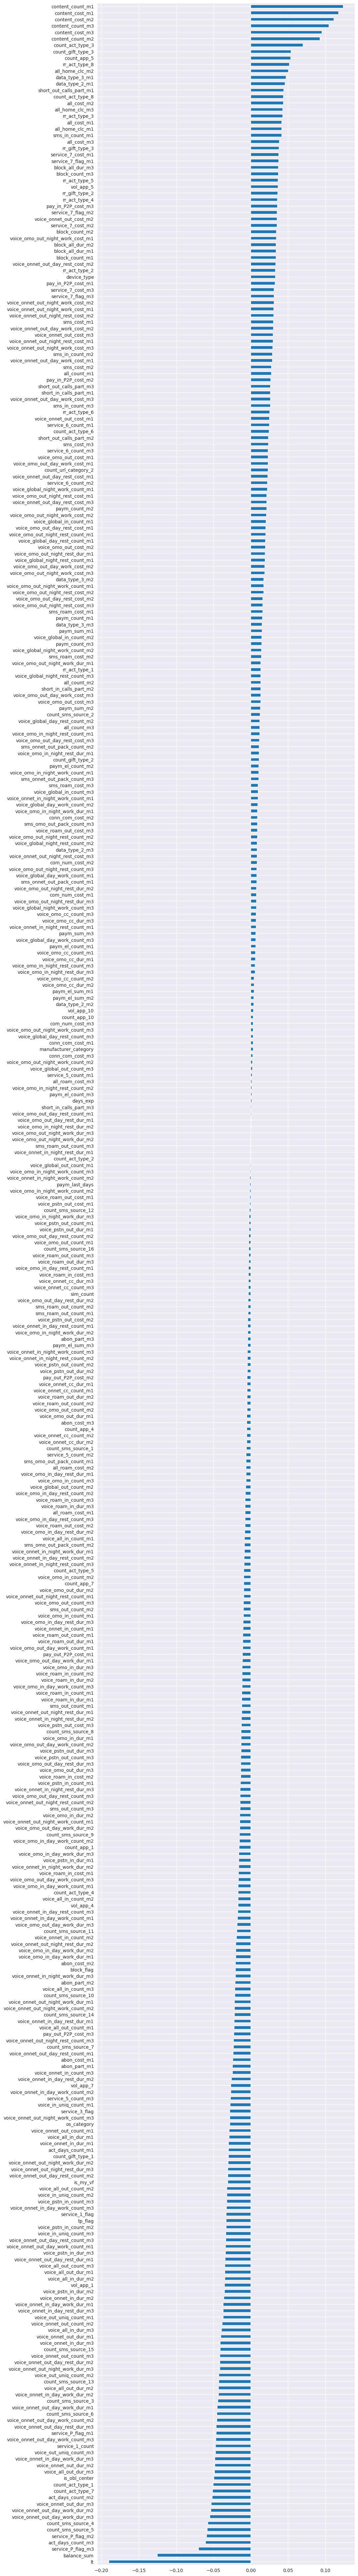

In [ ]:
#@title кореляція всіх ознак з таргетом
sns.set_style("darkgrid")
plt.figure(figsize=(10, 100))
corr['target'][:-1].sort_values().plot(kind='barh')
plt.show()

По даному графіку видно, що кореляція між таргетом та більшістю даних невелика, а також видно що кількість змінних з від'ємною кореляцією приблизно рівна кількості з додатньою кореляцією.
Можна виділити деякі змінні наверху і знизу, які мають більшу кореляцію з цільовою змінною.

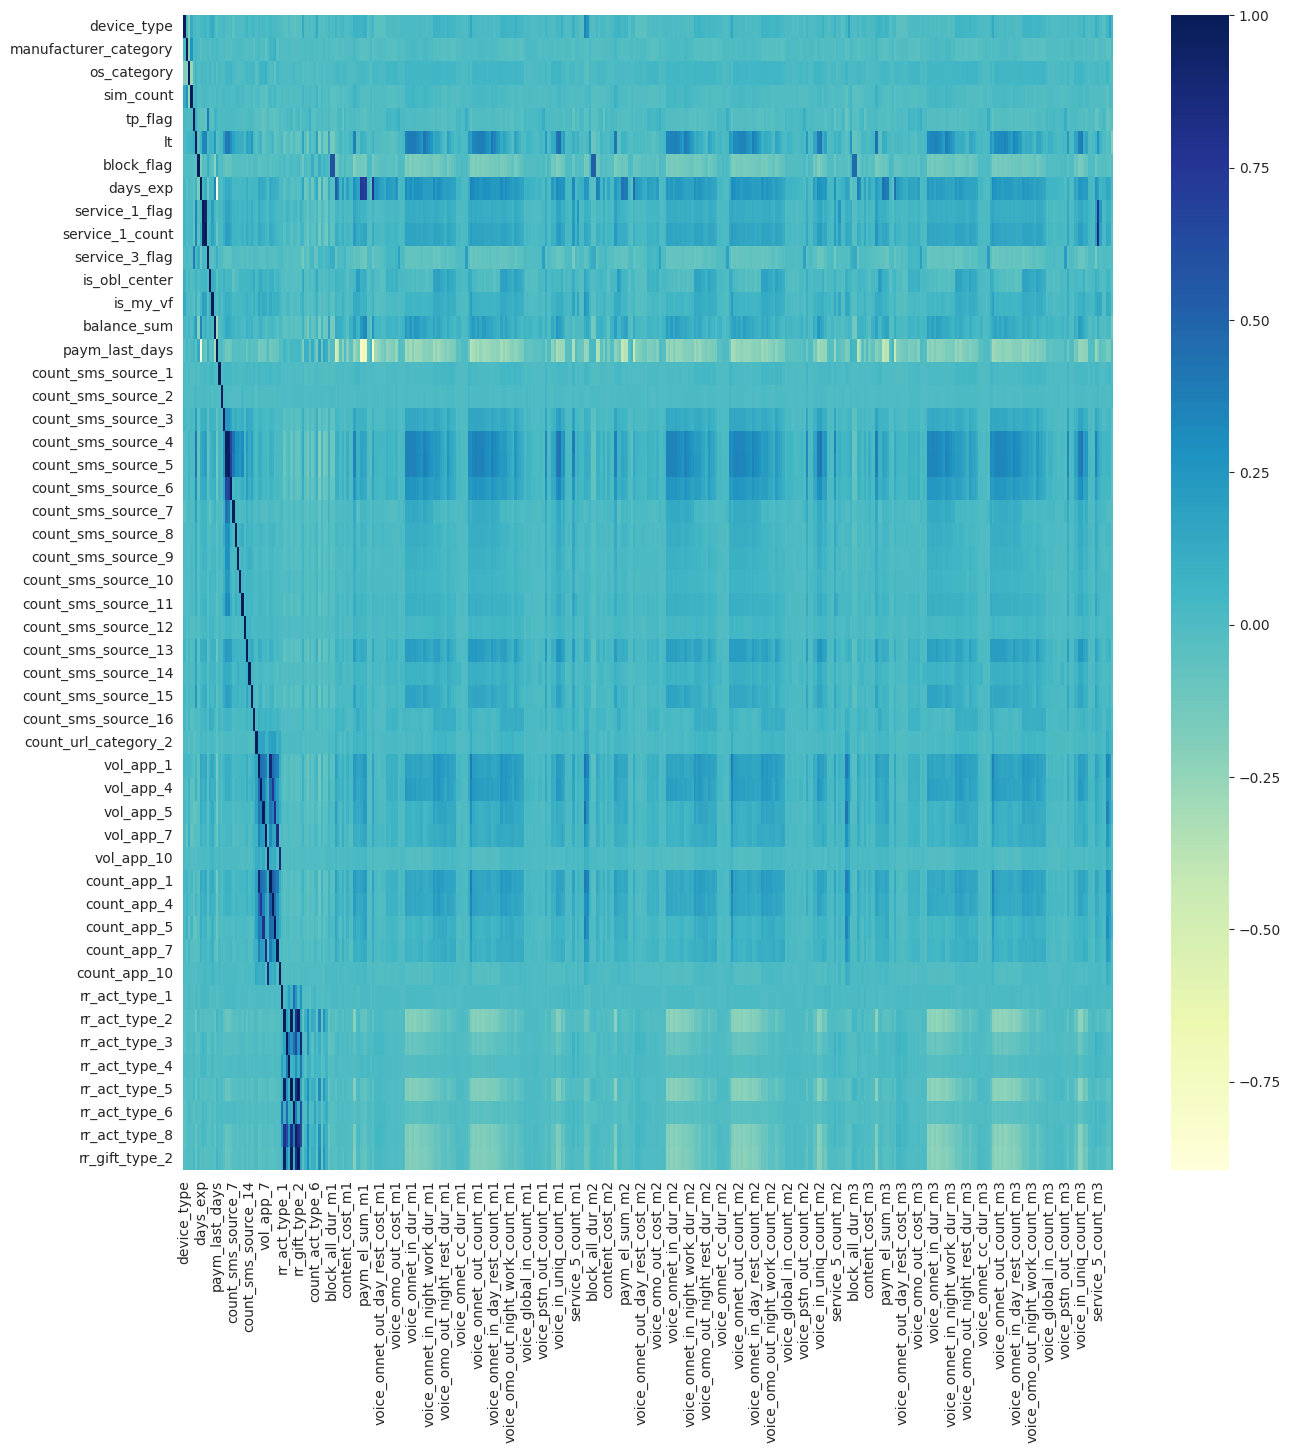

In [ ]:
#@title Виведу матрицю кореляцій у вигляді теплової карти, так як у нас багато ознак, то розіб'ю на 8 частин.
plt.figure(figsize=(15, 15))
sns.heatmap(corr[:50], cmap='YlGnBu')
plt.show()

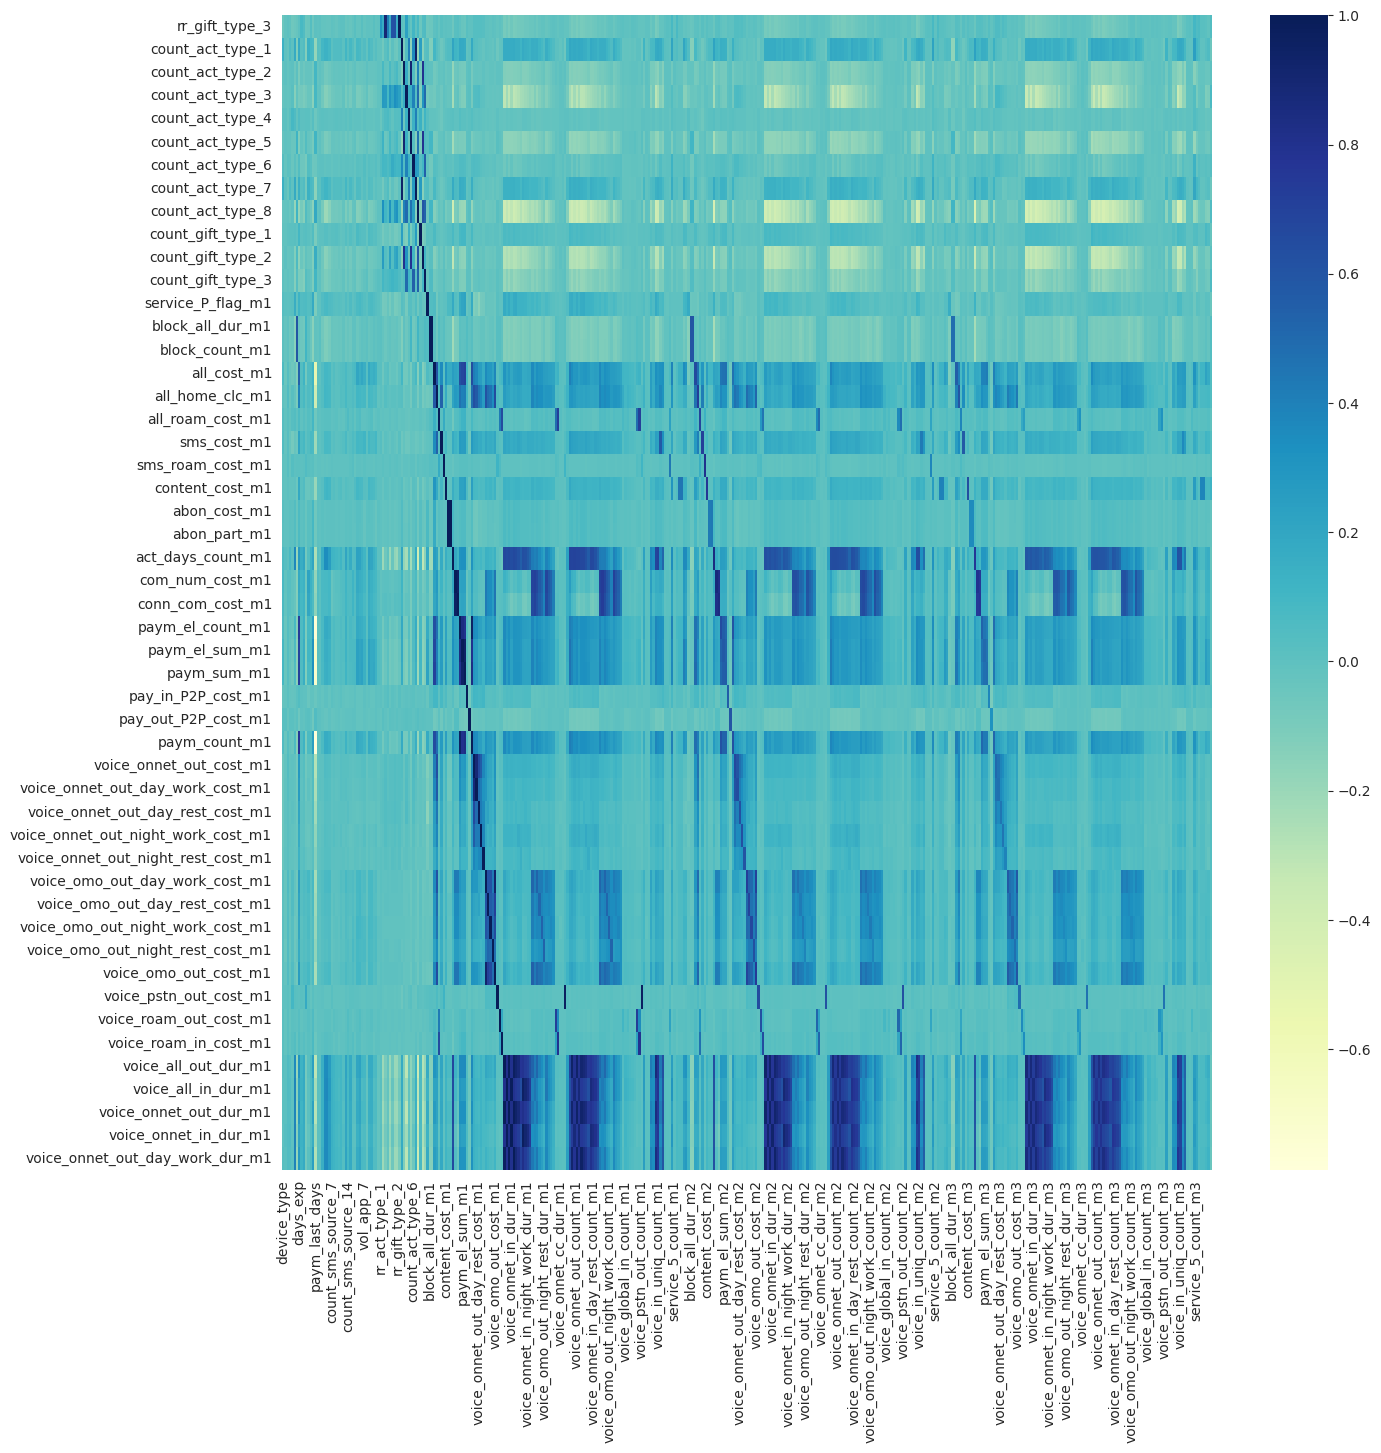

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr[50:100], cmap='YlGnBu')
plt.show()

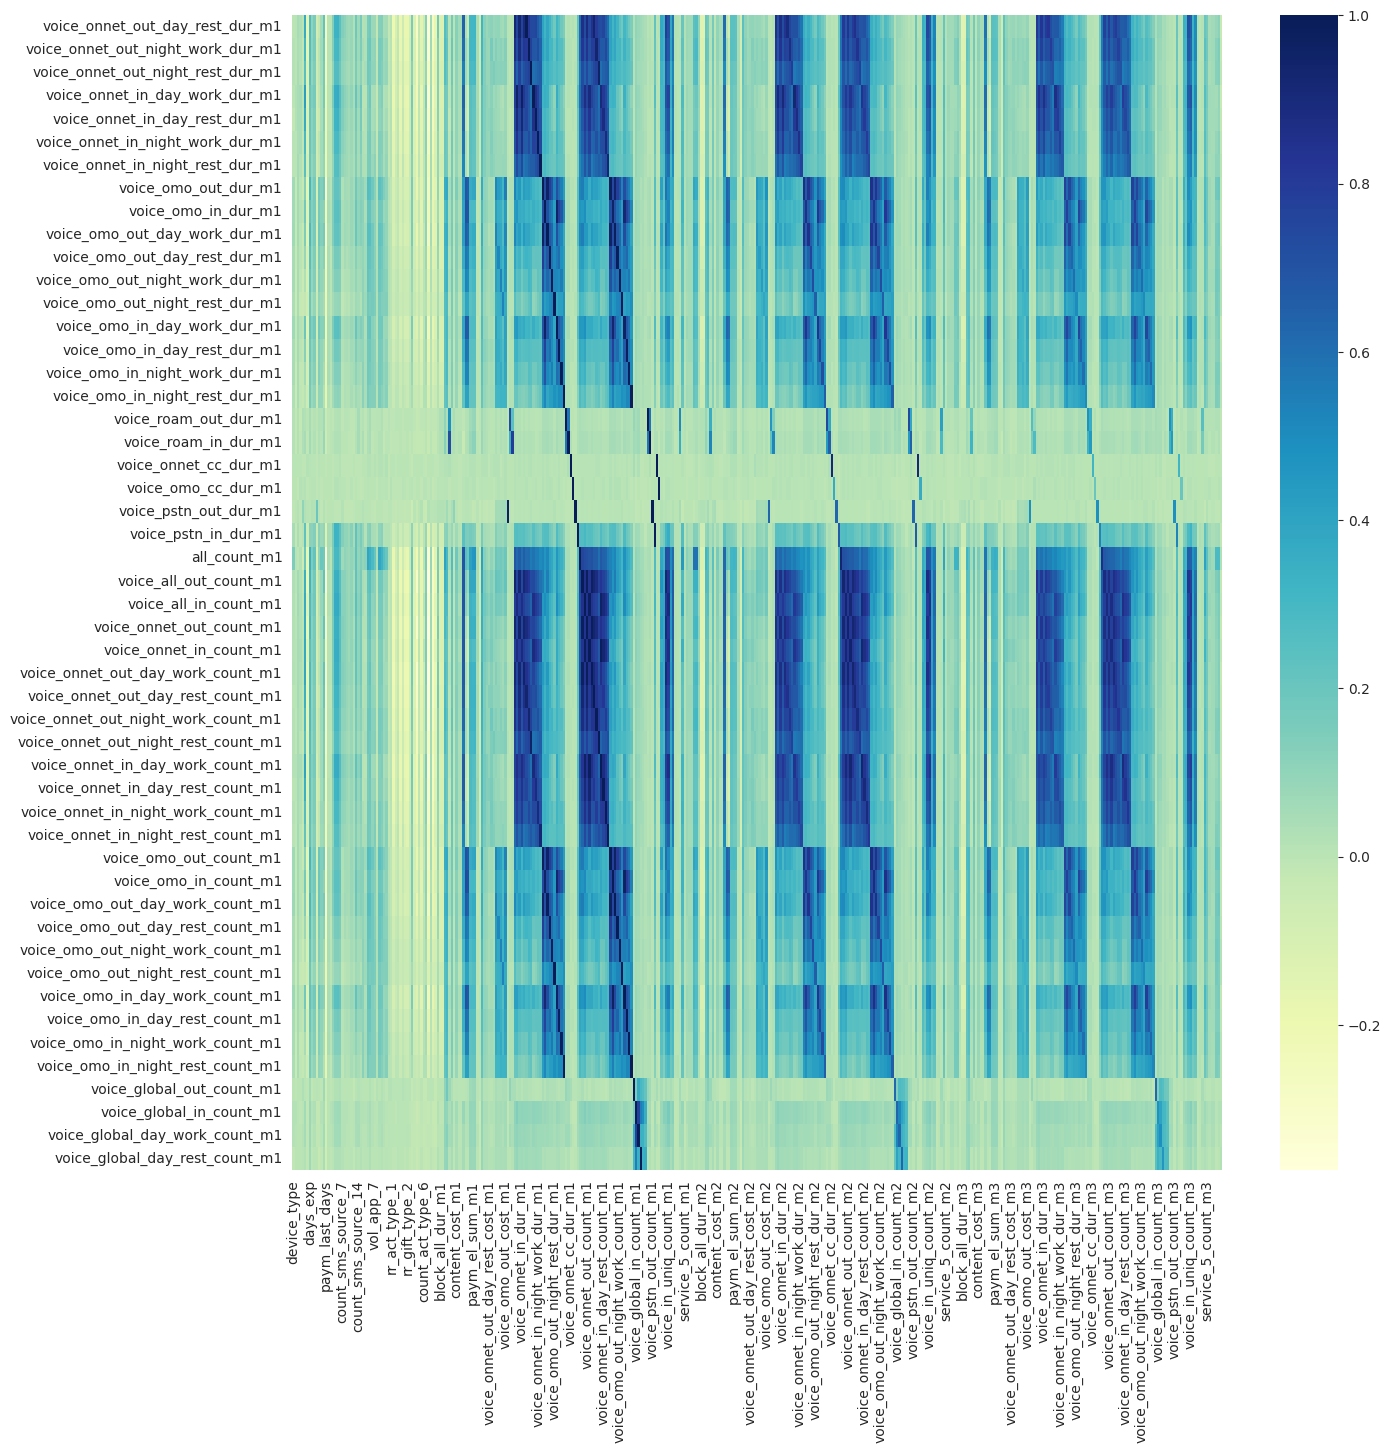

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr[100:150], cmap='YlGnBu')
plt.show()

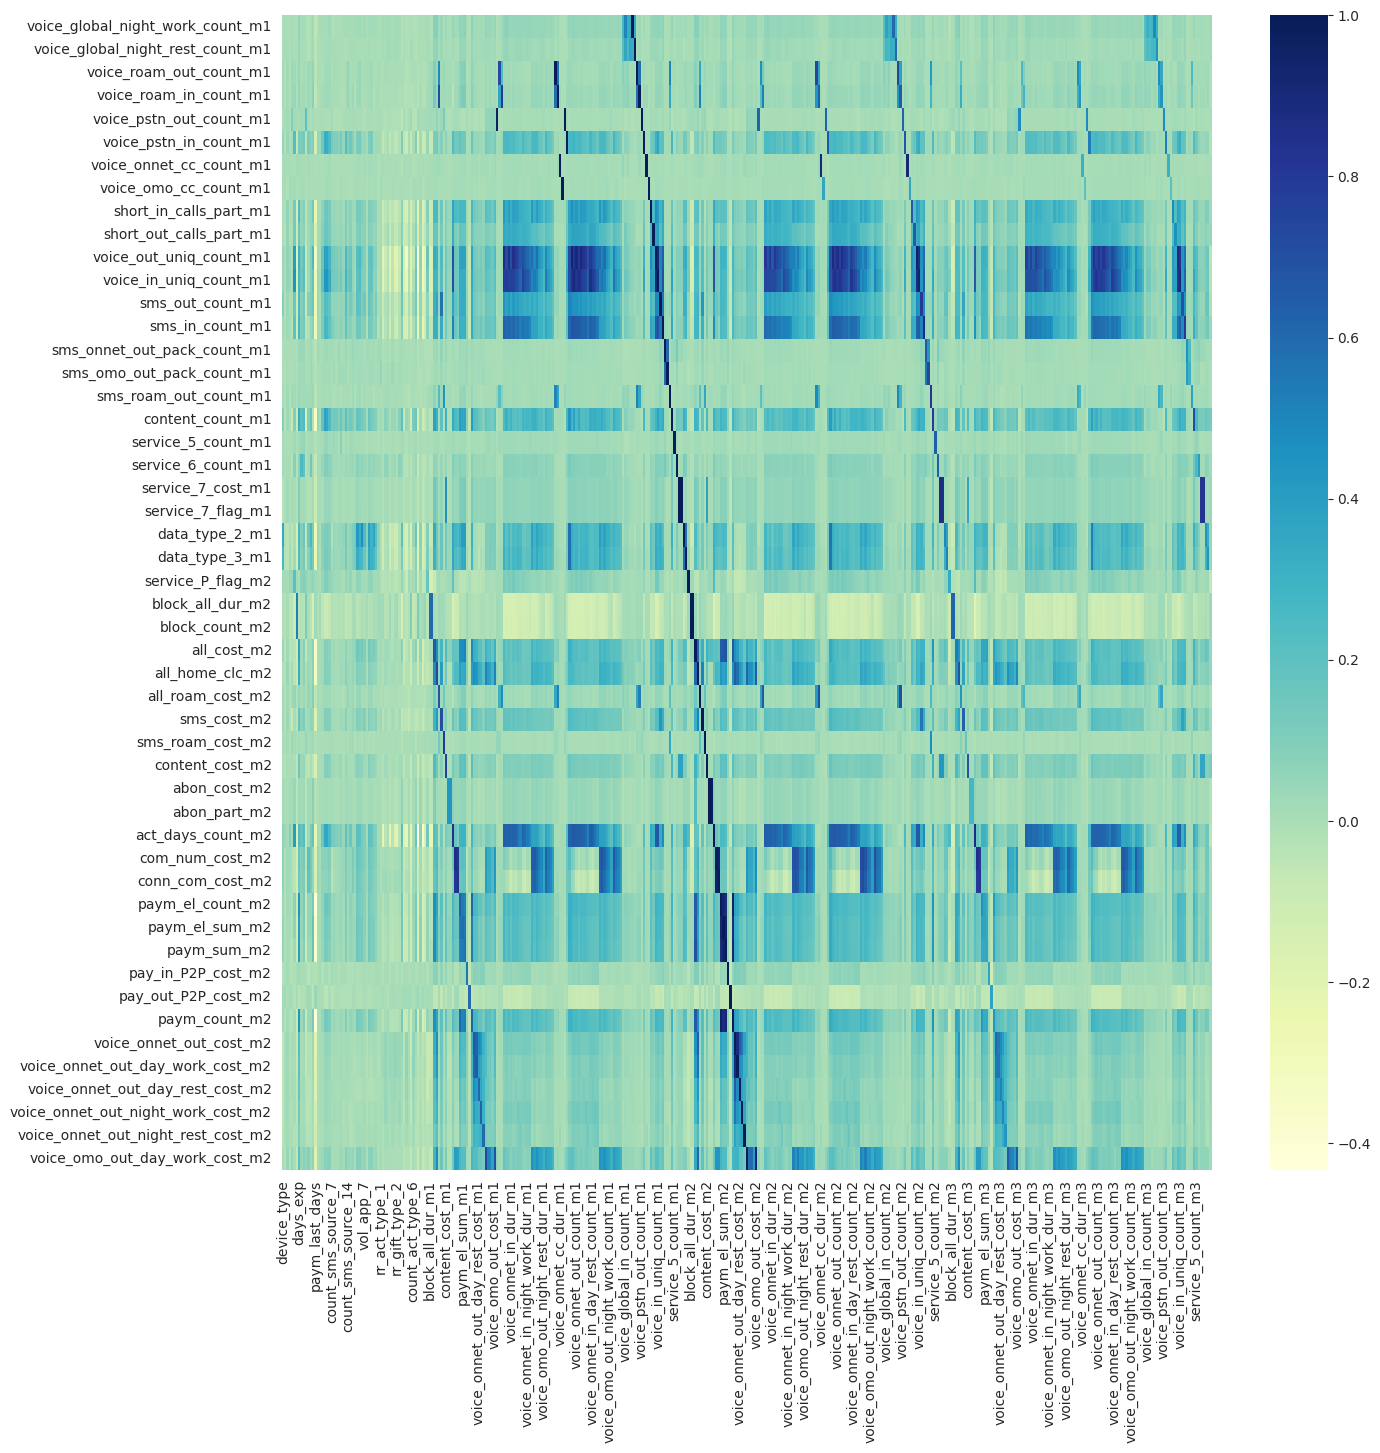

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr[150:200], cmap='YlGnBu')
plt.show()

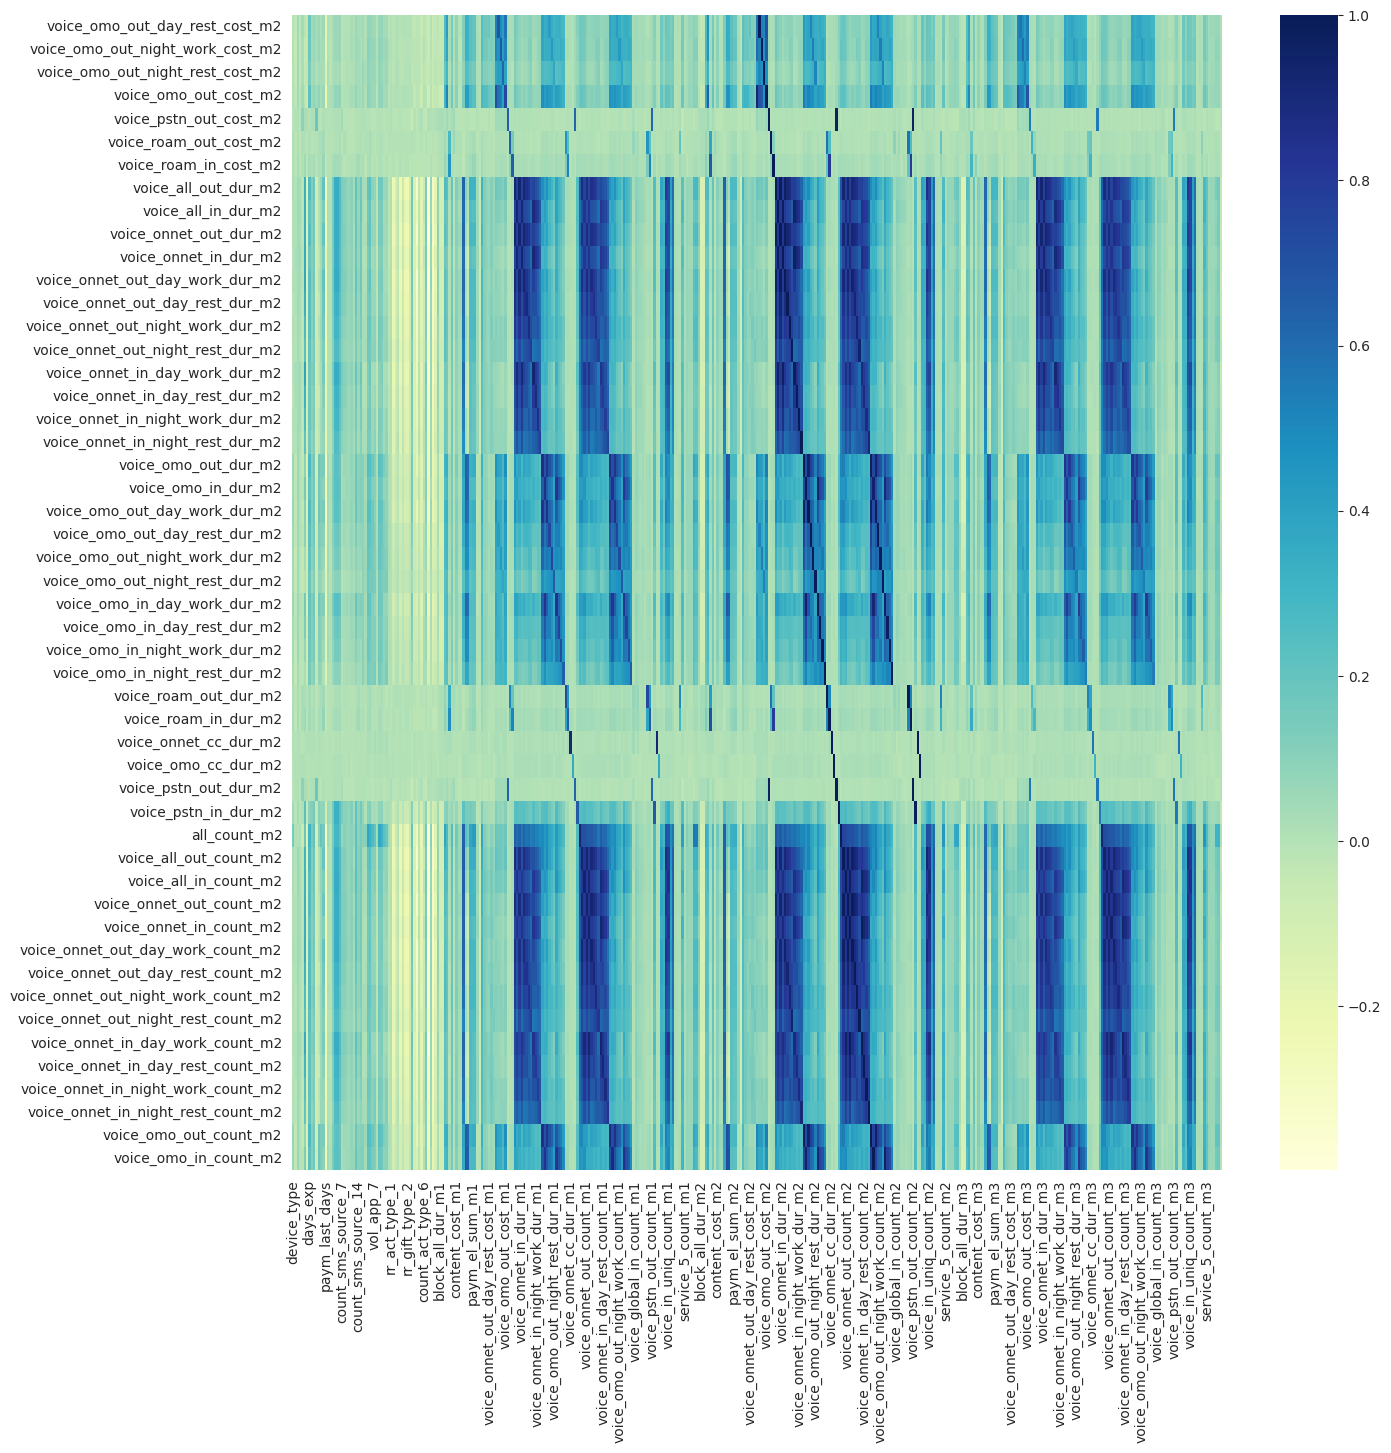

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr[200:250], cmap='YlGnBu')
plt.show()

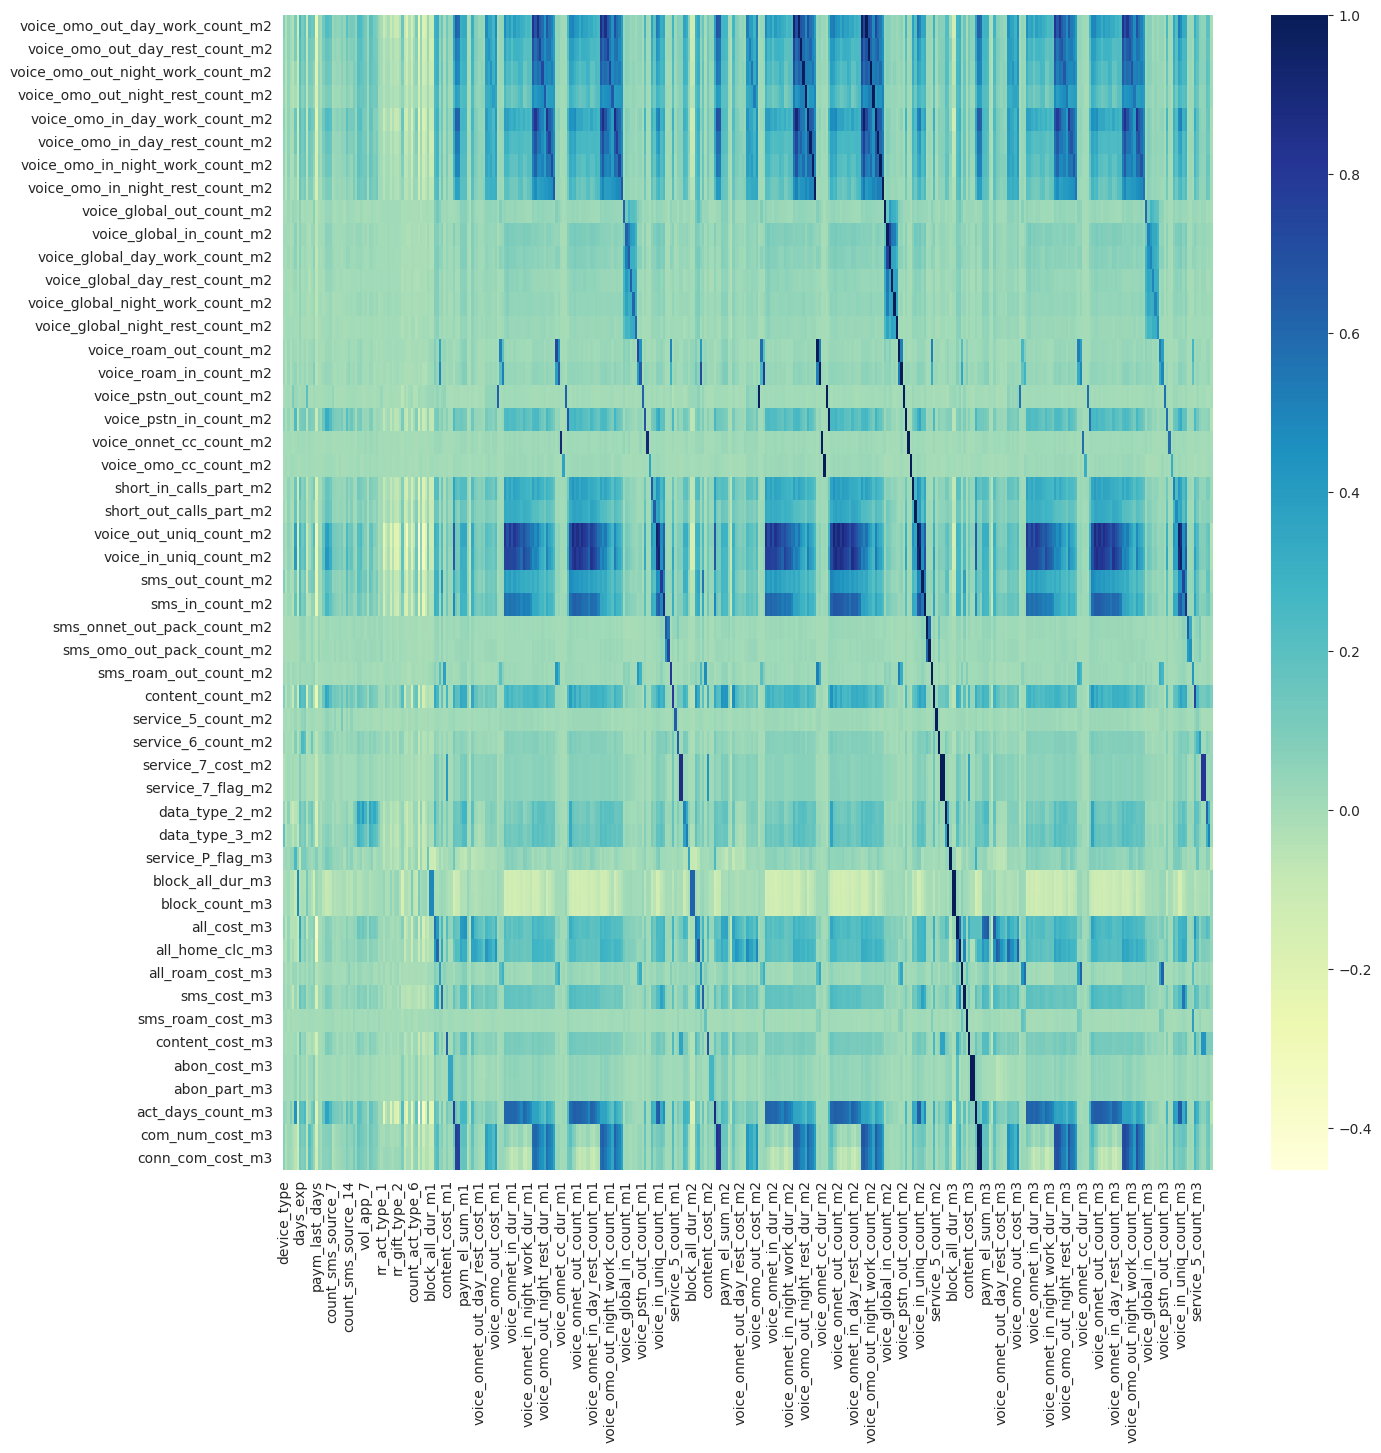

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr[250:300], cmap='YlGnBu')
plt.show()

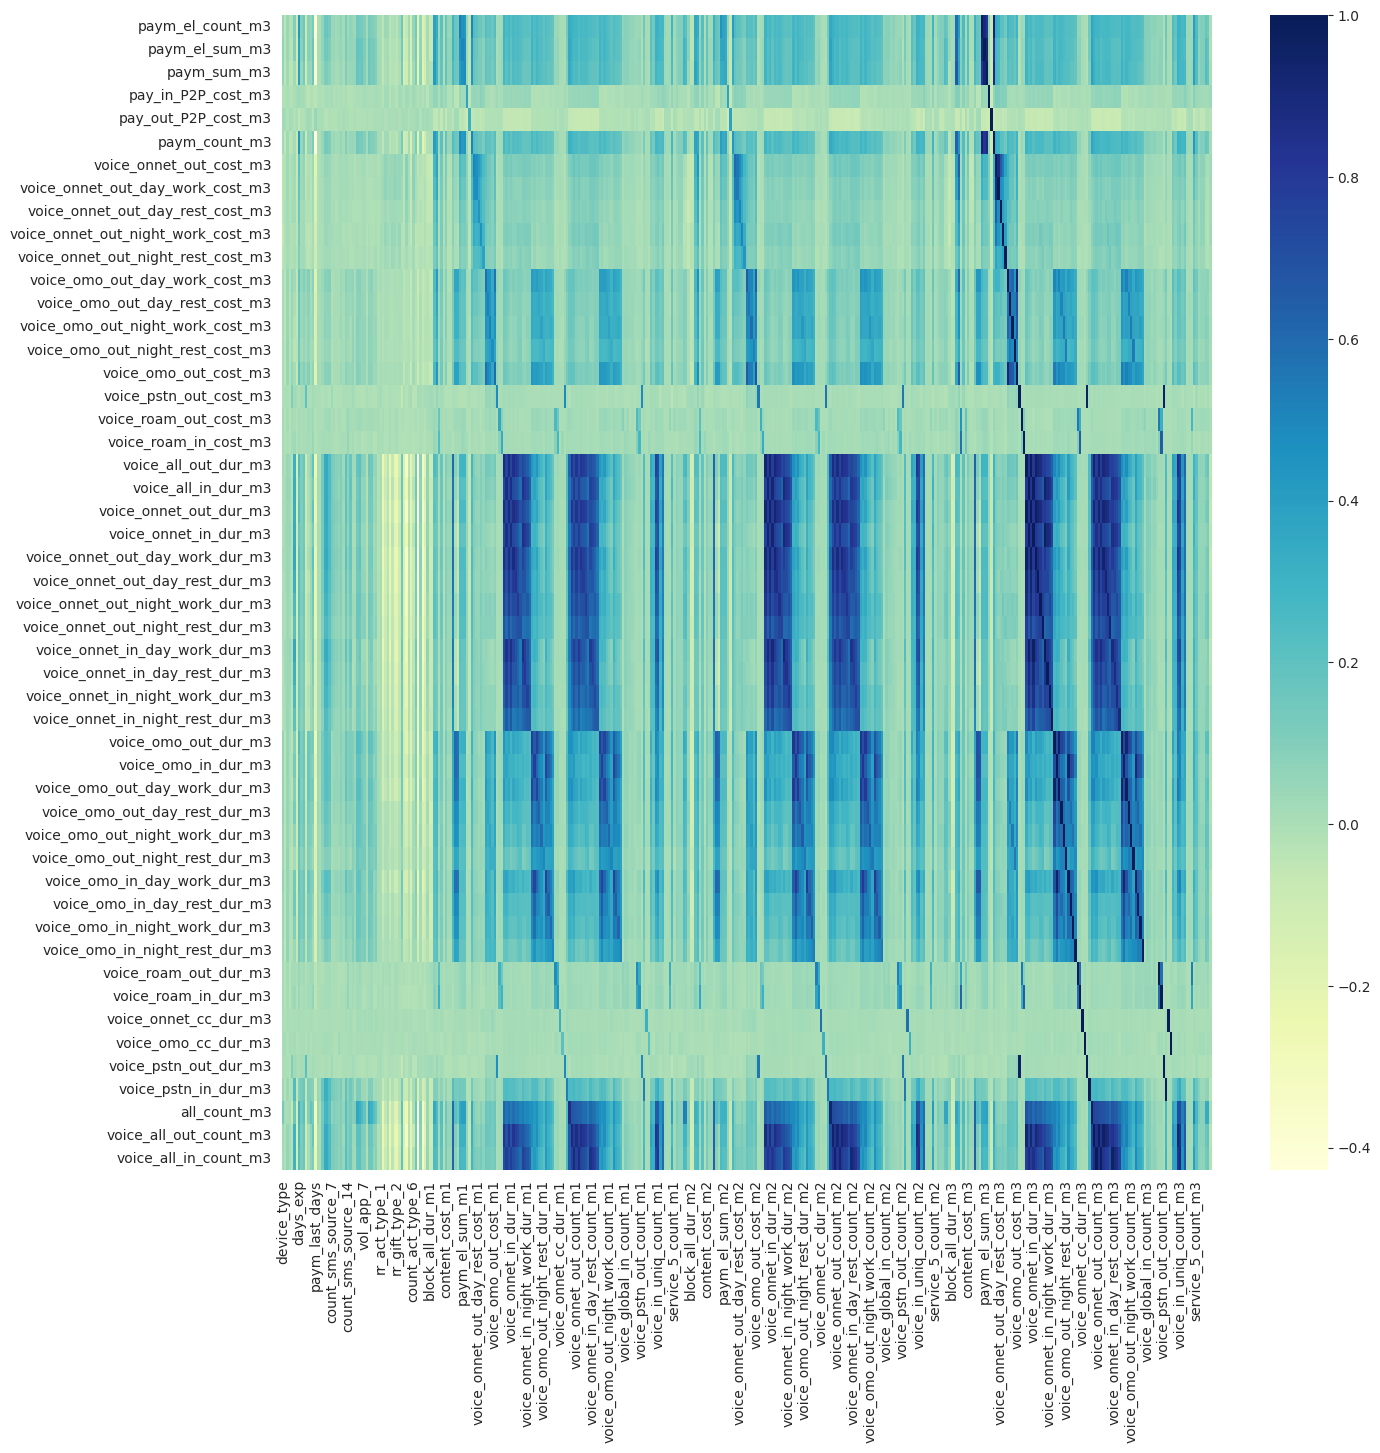

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr[300:350], cmap='YlGnBu')
plt.show()

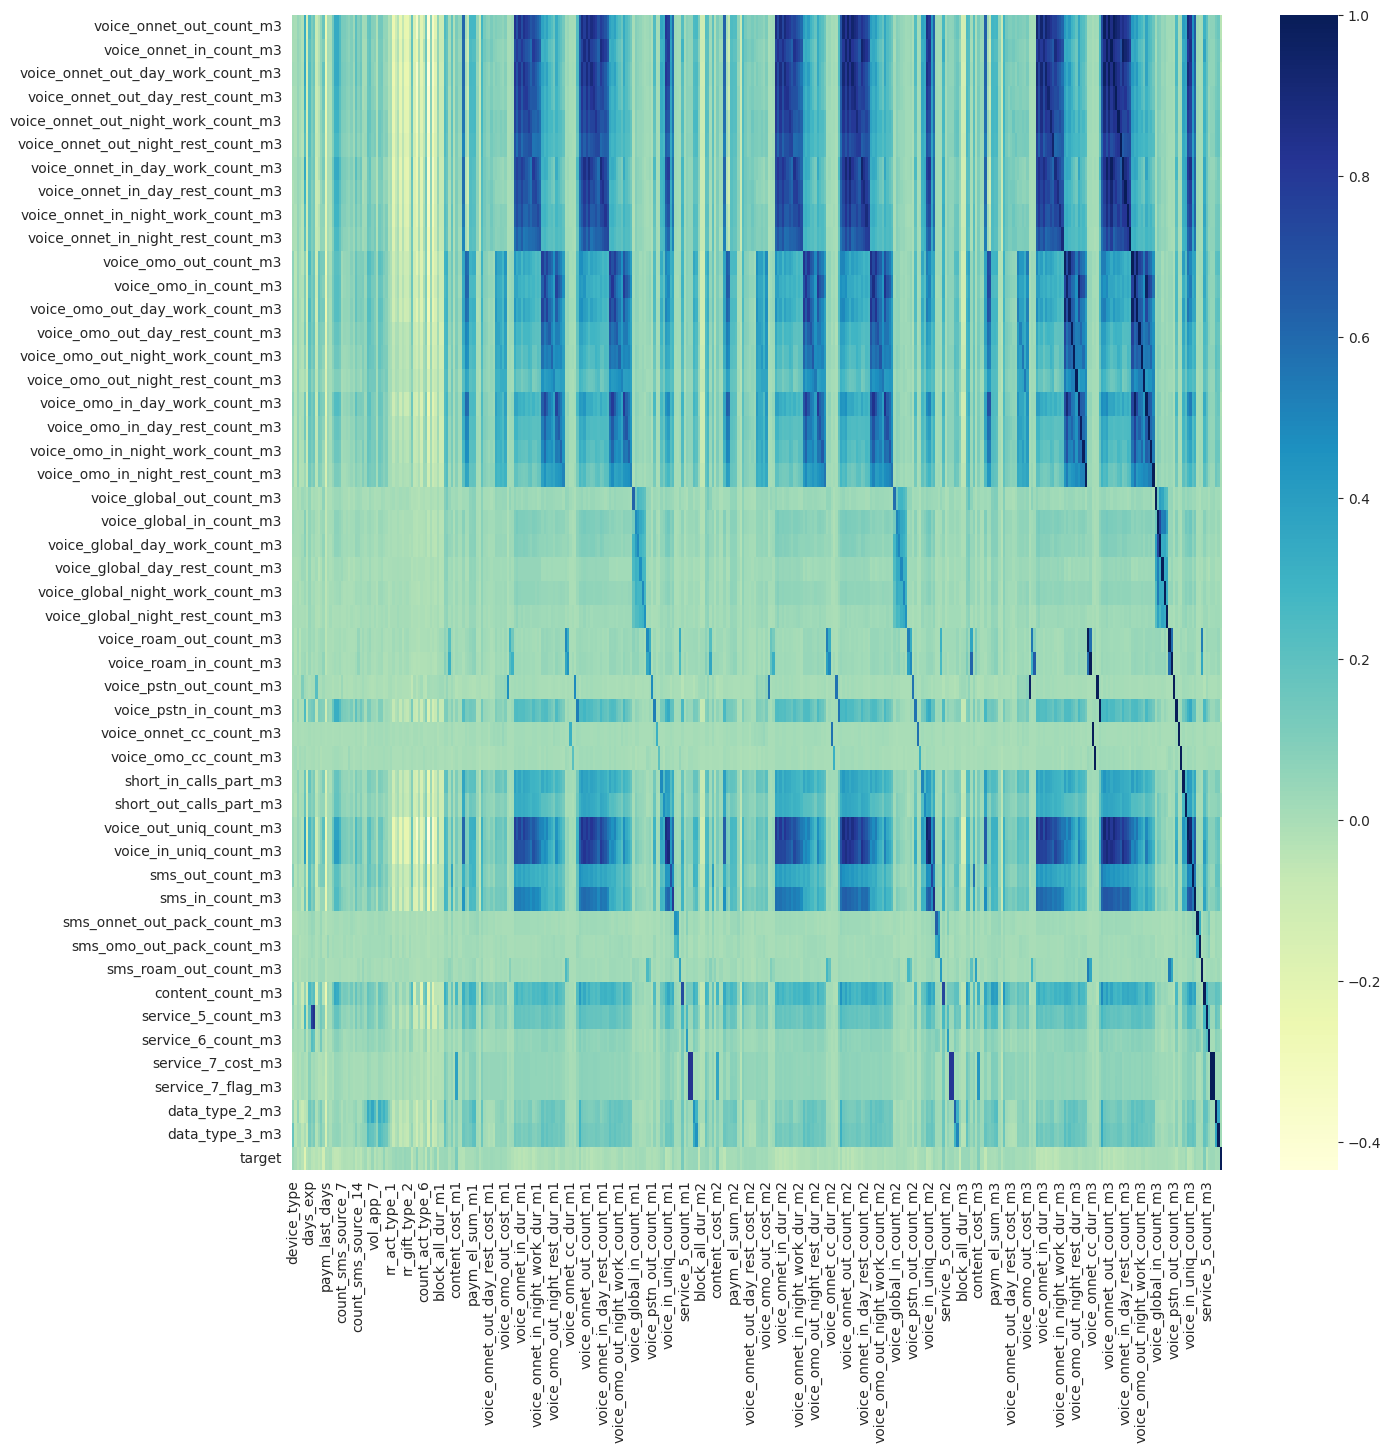

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr[350:], cmap='YlGnBu')
plt.show()

По кореляційній матриці можем зробити такий висновок: ознаки з груп 'Network Actions Stats', 'Voice Duration', 'Voice Costs' мають між собою найбільшу кореляцію.Можна відмітити, що протилежну кореляцію з більшістю інших ознак мають змінні групи 'Previous Campaigns Results' та 'Features in Dynamics'.

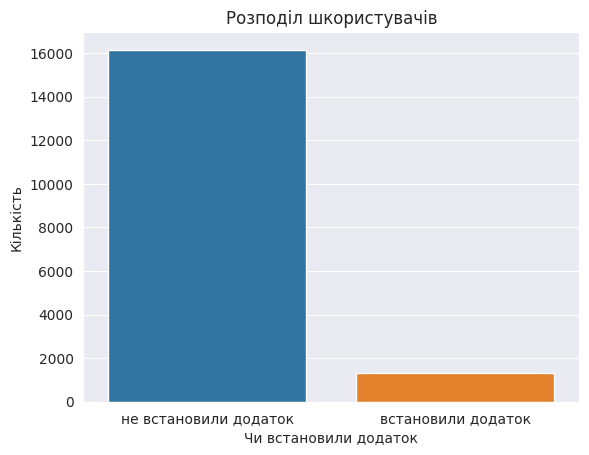

In [ ]:
#@title Розподіл користувачів
sns.countplot(x=df["target"])
plt.xticks ([0, 1], labels=['не встановили додаток', 'встановили додаток'])
plt.ylabel('Кількість')
plt.xlabel('Чи встановили додаток')
plt.title('Розподіл користувачів')
plt.show()


По розподілу видно, що користувачів, які встановили додадоток набагато менше

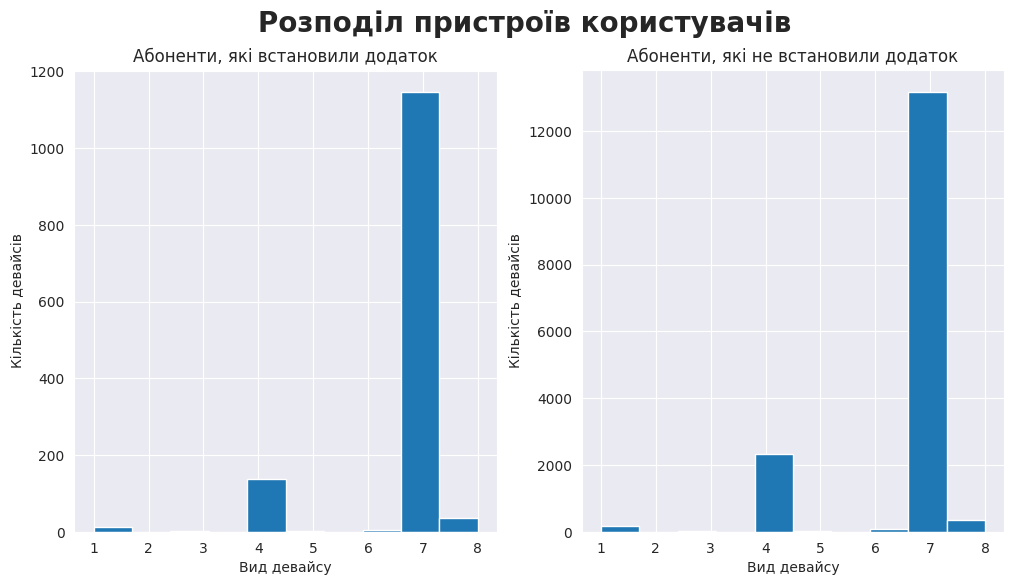

In [ ]:
#@title Розподіл пристроїв користувачів
install_app = df.loc[df["target"] == 1]
not_install_app = df.loc[df["target"] == 0]

fig = plt.figure(figsize=(12, 6))

fig.add_subplot(1,2,1)
install_app['device_type'].hist()
plt.xlabel('Вид девайсу')
plt.ylabel('Кількість девайсів')
plt.title('Абоненти, які встановили додаток')

fig.add_subplot(1,2,2)
not_install_app['device_type'].hist()
plt.xlabel('Вид девайсу')
plt.ylabel('Кількість девайсів')
plt.title('Абоненти, які не встановили додаток')


fig.suptitle('Розподіл пристроїв користувачів', fontsize=20, weight='bold')
plt.show()


На графіку видно, що обидві категорії мають однакове відношення пристроїв(переважає девайс 7 типу), тобто можем зробити висновок: від типу девайсу не залежало чи встановили вони додаток.

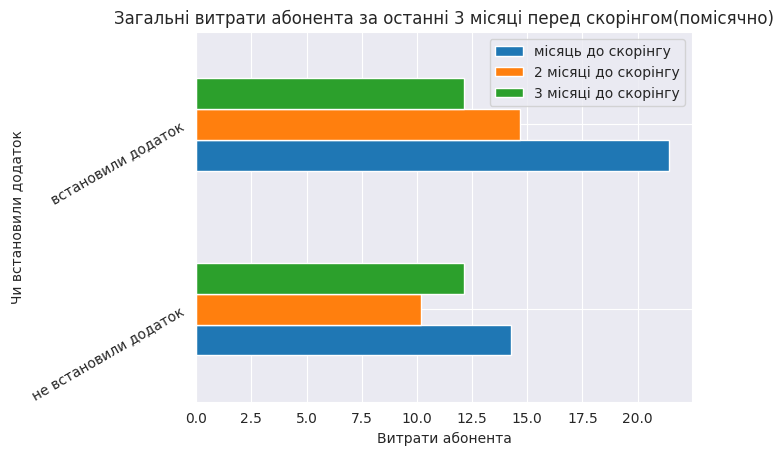

In [ ]:
#@title Загальні витрати абонента за останні 3 місяці перед скорінгом
label=['місяць до скорінгу', '2 місяці до скорінгу', '3 місяці до скорінгу']

df.groupby("target")[['all_cost_m1', 'all_cost_m2', 'all_cost_m3']].median().plot(kind='barh')
plt.title('Загальні витрати абонента за останні 3 місяці перед скорінгом(помісячно)')
plt.xlabel('Витрати абонента')
plt.ylabel('Чи встановили додаток')
plt.yticks ([0, 1], labels=['не встановили додаток', 'встановили додаток'], rotation=30)
plt.legend(label)
plt.show()


 По даному графіку можем відмітити те, що у людей які встановили додаток - витрати помісячно зростали, також можна відмітити за місяць до скорінгу вони значно зросли.Звідси можна зробити висновок, що користувачі у яких зростають загальні витрати помісячно - більш схильні до встановлення додатку Vodafone Music

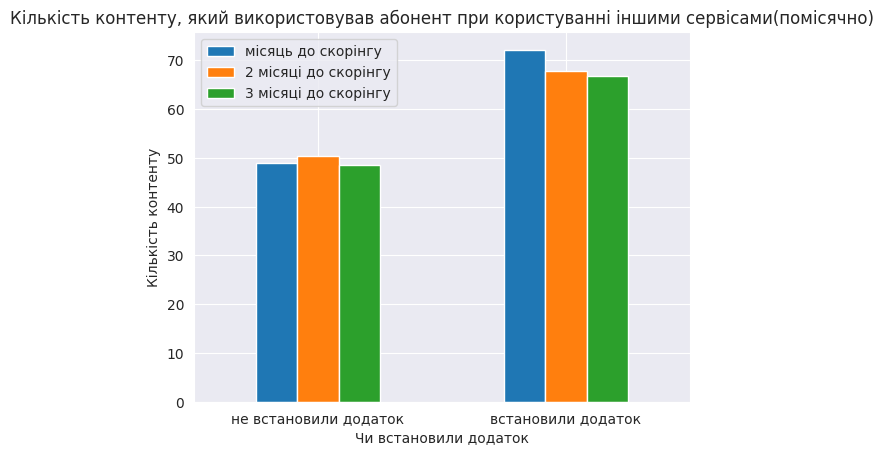

In [ ]:
#@title Кількість контенту, який використовував абонент при користуванні іншими сервісами
df.groupby("target")[['content_count_m1', 'content_count_m2', 'content_count_m3']].mean().plot(kind='bar')
plt.title('Кількість контенту, який використовував абонент при користуванні іншими сервісами(помісячно)')
plt.ylabel('Кількість контенту')
plt.xlabel('Чи встановили додаток')
plt.xticks ([0, 1], labels=['не встановили додаток', 'встановили додаток'], rotation=0)
plt.legend(label)
plt.show()

Абоненти, які встановили додаток використовували більше контенту, також можна зробити висновок, що інтерес до контенту зростав.

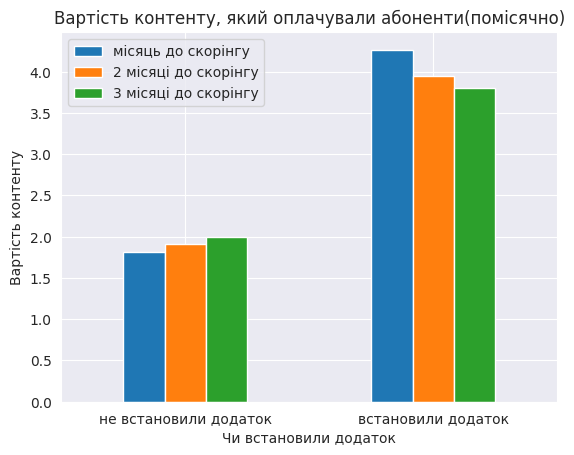

In [ ]:
#@title Вартість контенту
df.groupby("target")[['content_cost_m1', 'content_cost_m2', 'content_cost_m3']].mean().plot(kind='bar')
plt.title('Вартість контенту, який оплачували абоненти(помісячно)')
plt.ylabel('Вартість контенту')
plt.xlabel('Чи встановили додаток')
plt.xticks ([0, 1], labels=['не встановили додаток', 'встановили додаток'], rotation=0)
plt.legend(label)
plt.show()

Вартість оплачуваного контенту набагато вища та помісячно зростала у абонентів, які встановили додаток Vodafone Music.

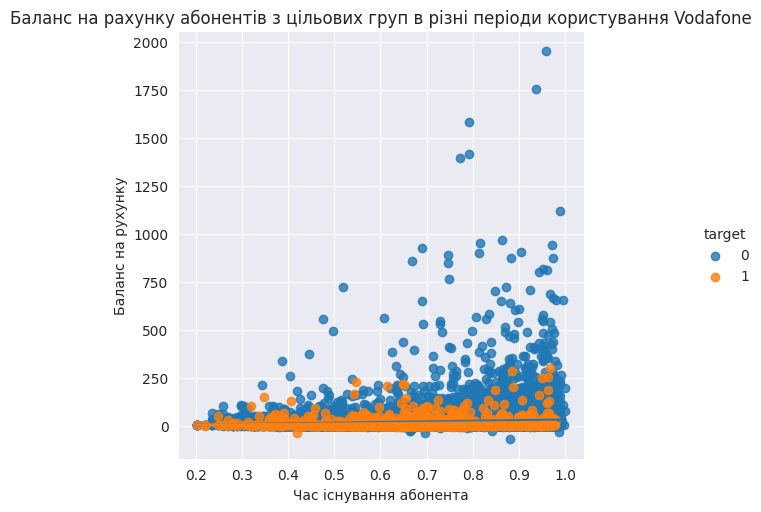

In [ ]:
#@title Баланс на рахунку
df_for_viz = df[df["balance_sum"] < 3500]
sns.lmplot(data=df_for_viz, x="lt", y="balance_sum", hue="target", legend=['не встановили додаток', 'встановили додаток'])
plt.title('Баланс на рахунку абонентів з цільових груп в різні періоди користування Vodafone')
plt.ylabel('Баланс на рухунку')
plt.xlabel('Час існування абонента')
#plt.legend(labels=['не встановили додаток', 'встановили додаток'])
plt.show()

У користувачів, які не встановили додадто баланс на рухунку зростав лінійно з часом існування абонента та був більший, ніж в користувачів які встановили додаток.Можна зробити висновок, що абоненти, які встановили додаток не тримали гроші на рахунку та витрачали іх, також чим довше існування абонента - тим менша вірогідність, що він встановить додаток.

Отже, підбивши підсумок з аназілу візуалізацій, можем описати абонента, який має більшу схильність до придбання і встановлення додатку Vodafone Music:

*   Абонент має повищені загальні витрати, особливо витрати на різноманітний контент
*   Використання дорожчого контенту
*   Використовує більшу кількість контенту
*   Не тримає гроші на рахунку





## Стандартизація даних


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.drop('target', axis=1)
y = df['target']
X_st = scaler.fit_transform(X)

## Зменшення розмірності та візуалізація

In [ ]:
#@title Зменшення розмірності до 2 компонентів за допомогою методу PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pc_components = pca.fit_transform(X_st)

In [ ]:
#@title Вивів накопичувану відносну дисперсію, пояснювану кожною компонентою
pca.explained_variance_ratio_.cumsum()

array([0.14982884, 0.23489604])

In [ ]:
#@title Розрахуєм навантаження головних компонентів на початкові координати і спробуєм дізнатись що наші компоненти собою представляють.Також виведем матрицю навантаження відсортовану спочатку по першому головному компоненту, а потім по другому.
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=df.columns[:-1])
loading_matrix.sort_values('PC1', ascending=False).head(50)

PC1       PC2
voice_all_out_count_m2               0.859399 -0.270999
voice_all_in_count_m2                0.851370 -0.267302
voice_all_out_count_m1               0.849624 -0.252446
voice_all_out_count_m3               0.848009 -0.275770
voice_all_in_count_m1                0.841918 -0.246676
voice_all_in_count_m3                0.834042 -0.273145
voice_onnet_out_count_m2             0.800521 -0.417982
voice_onnet_out_count_m3             0.791921 -0.417409
voice_out_uniq_count_m2              0.791893 -0.167939
voice_onnet_out_count_m1             0.790259 -0.403531
voice_onnet_in_count_m2              0.786919 -0.423913
voice_all_out_dur_m2                 0.786494 -0.361638
voice_out_uniq_count_m1              0.781648 -0.150039
voice_out_uniq_count_m3              0.780794 -0.175752
voice_all_out_dur_m1                 0.780714 -0.342949
voice_onnet_in_count_m1              0.779782 -0.411637
voice_all_out_dur_m3                 0.779174 -0.359624
voice_onnet_in_count_m3              0.774091 -0.421772
voice_in_uniq_count_m2               0.766203 -0.141682
voice_onnet_out_day_work_count_m2    0.757299 -0.392800
voice_in_uniq_count_m1               0.753374 -0.112164
voice_in_uniq_count_m3               0.751644 -0.154154
voice_onnet_out_day_work_count_m3    0.747840 -0.391769
voice_onnet_out_day_work_count_m1    0.747000 -0.380529
voice_onnet_out_dur_m2               0.741805 -0.451653
voice_onnet_in_day_work_count_m2     0.740313 -0.397634
voice_onnet_out_dur_m3               0.735993 -0.447128
voice_onnet_out_dur_m1               0.733836 -0.436514
voice_onnet_in_day_work_count_m1     0.733002 -0.387556
voice_onnet_out_day_rest_count_m2    0.729594 -0.404103
voice_onnet_in_day_work_count_m3     0.728433 -0.394415
voice_onnet_out_day_rest_count_m3    0.723881 -0.402805
voice_onnet_out_day_work_dur_m2      0.720447 -0.434911
voice_onnet_out_day_rest_count_m1    0.720153 -0.388980
voice_all_in_dur_m2                  0.716758 -0.378599
voice_onnet_out_day_work_dur_m3      0.713967 -0.429439
voice_onnet_in_day_rest_count_m2     0.710948 -0.412759
voice_onnet_out_day_work_dur_m1      0.710180 -0.420286
voice_all_in_dur_m3                  0.709099 -0.378443
voice_onnet_in_day_rest_count_m1     0.707737 -0.403717
voice_onnet_out_night_work_count_m2  0.707710 -0.356011
voice_all_in_dur_m1                  0.705939 -0.359334
voice_onnet_in_day_rest_count_m3     0.701892 -0.412809
voice_onnet_out_night_work_count_m3  0.701791 -0.357872
voice_onnet_out_night_work_count_m1  0.690725 -0.338114
voice_onnet_in_night_work_count_m2   0.684396 -0.348515
voice_onnet_in_night_work_count_m3   0.678933 -0.353456
voice_onnet_in_night_work_count_m1   0.668042 -0.330408
voice_onnet_in_dur_m2                0.664778 -0.471732
voice_onnet_in_dur_m3                0.660130 -0.468642

Висновок: перший компонент 'PC1' більшою мірою містить в собі ознаки інформації про тривалість розмов та статистику мережевих дій.

Total Outgoing Calls,
Total Incoming Calls,
Vodafone Outgoing Calls,
Vodafone Incoming Calls,
Unique Outgoing Calls.

In [ ]:
#@title PC2
loading_matrix.sort_values('PC2', ascending=False).head(50)

PC1       PC2
voice_omo_out_count_m2             0.588416  0.661791
voice_omo_out_dur_m2               0.582162  0.660396
conn_com_cost_m2                   0.087030  0.659114
conn_com_cost_m3                   0.094366  0.649257
voice_omo_out_count_m1             0.570448  0.644956
voice_omo_out_dur_m1               0.561225  0.643077
conn_com_cost_m1                   0.077011  0.643032
voice_omo_out_dur_m3               0.567935  0.640077
voice_omo_out_count_m3             0.577738  0.639859
com_num_cost_m2                    0.181269  0.616896
voice_omo_in_count_m2              0.567231  0.613061
com_num_cost_m3                    0.185620  0.605844
voice_omo_out_cost_m2              0.413891  0.605481
voice_omo_out_day_work_count_m2    0.566129  0.605044
com_num_cost_m1                    0.167471  0.601978
voice_omo_out_day_work_dur_m2      0.558425  0.598545
voice_omo_out_cost_m3              0.413531  0.596328
voice_omo_in_count_m3              0.555234  0.595116
voice_omo_out_day_work_count_m1    0.548771  0.593082
voice_omo_out_day_work_count_m3    0.556059  0.583786
voice_omo_out_day_work_dur_m1      0.536338  0.583700
voice_omo_in_count_m1              0.534746  0.583577
voice_omo_out_day_work_dur_m3      0.542624  0.580806
voice_omo_out_day_rest_count_m2    0.498098  0.577711
voice_omo_out_cost_m1              0.393019  0.577293
voice_omo_out_day_rest_count_m1    0.482677  0.574033
voice_omo_in_day_work_count_m2     0.545880  0.559377
voice_omo_in_day_work_count_m1     0.537386  0.558346
voice_omo_out_day_rest_count_m3    0.486439  0.557836
voice_omo_out_night_work_count_m3  0.453262  0.557221
voice_omo_in_dur_m2                0.505378  0.555390
voice_omo_out_day_work_cost_m2     0.389903  0.549777
voice_omo_in_day_work_count_m3     0.541195  0.546566
voice_omo_in_day_rest_count_m2     0.487371  0.546190
voice_omo_in_dur_m1                0.493579  0.544232
voice_omo_out_day_work_cost_m3     0.385736  0.540976
voice_omo_in_day_rest_count_m1     0.466112  0.540806
voice_omo_in_dur_m3                0.498435  0.536538
voice_omo_out_day_rest_dur_m1      0.443140  0.534786
voice_omo_in_night_work_count_m2   0.435983  0.533789
voice_omo_out_night_work_count_m2  0.416493  0.532082
voice_omo_out_day_rest_dur_m2      0.455189  0.531456
voice_omo_out_day_work_cost_m1     0.372435  0.529549
voice_omo_in_day_rest_count_m3     0.471342  0.527482
voice_omo_in_night_work_count_m3   0.433337  0.523673
voice_omo_out_day_rest_dur_m3      0.454259  0.518851
voice_omo_in_day_work_dur_m1       0.490101  0.513248
voice_omo_out_night_work_count_m1  0.403509  0.511968
voice_omo_in_day_work_dur_m2       0.490553  0.511362
voice_omo_out_night_work_dur_m2    0.391296  0.508380

Висновок: компонент 'PC2' більшою мірою містить в собі ознаки інформації про тривалість вихідних дзвінків Vodafone, тривалість дзвінків до інших операторів, а також - 'com_num_cost' і 'conn_com_cost', що значать:
 '% of effect communication'  і  '% of ineffect communication'

voice_onnet_out_count -	Vodafone Outgoing Calls
voice_omo_out_dur	Outgoing - Other Mobile Operator Voice Duration
com_num_cost	- % of effect communication
conn_com_cost -	% of ineffect communication

In [ ]:
df_pca = pd.DataFrame(pc_components, columns=['PC1', 'PC2'])

In [ ]:
df_pca['target'] = df['target']
df_pca.head(5)

PC1       PC2  target
0  0.983292 -5.633635       0
1  5.892624 -7.054705       0
2 -9.427047  0.361999       0
3 -5.888099 -0.422234       1
4 -9.263451  0.780984       0

In [ ]:
pca_use = df_pca[df_pca["target"] == 1]
pca_not_use = df_pca[df_pca["target"] == 0]

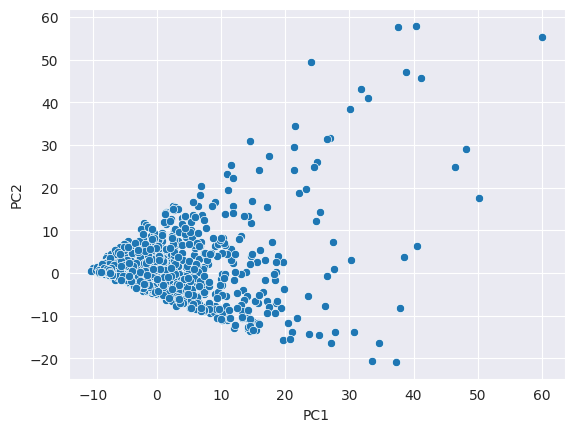

In [ ]:
sns.scatterplot(data=pca_use, x='PC1', y='PC2')
plt.show()

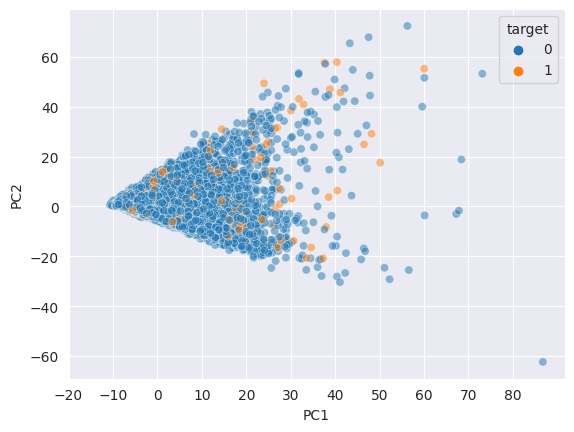

In [ ]:
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='target', alpha=0.5)
plt.xticks(range(-20, 90, 10))
plt.show()

Зроблено візуалізацію після зменшення розмірності за допомогою PCA до двох компонентів.На графіку зображено розсіювання цілової групи відносно головних компонентів.При збільшенні 'PC1' спостерігаємо що повищюєтья розсіювання значень 'PC2' а також змінюється відношення значень цільової групи.

In [ ]:
round((len(pca_use[pca_use["PC1"] > 25])/len(pca_not_use[pca_not_use["PC1"] > 25]) * 100), 1)

17.8

Відсоток клієнтів Vodafone, які встановили додаток серед абонентів, в яких більша тривалість розмов та активність мережевих дій.

In [ ]:
round((len(pca_use[pca_use["PC1"] < 25])/len(pca_not_use[pca_not_use["PC1"] < 25]) * 100), 1)

8.2

Відсоток клієнтів Vodafone, які встановили додаток серед абонентів, в яких менша тривалість розмов та активність мережевих дій.

In [ ]:
len(df_pca[df_pca["PC1"] < 25])

17308

In [ ]:
len(df_pca[df_pca["PC1"] > 25])

192

**Можна зробити висновок, що при великій активності мережевих дій та тривалості розмов абонента збільшується збільшується % тих, хто встановить та оплатить додаток Vodafone Music.Разом з тим, кількість таких абонентів мала, це ми можем побачити на графіку**

## Розбиття на тестові та трейнові значення

In [ ]:
#@title train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_st, y, test_size=0.25, random_state=2023)

## Побудова моделі за допомогою LogisticRegression

In [ ]:
#@title LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
log_reg = LogisticRegression(max_iter=1000, random_state=2023, class_weight='balanced')
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.74      0.84      4054
           1       0.16      0.60      0.25       321

    accuracy                           0.73      4375
   macro avg       0.56      0.67      0.54      4375
weighted avg       0.90      0.73      0.79      4375



In [ ]:
pd.DataFrame(confusion_matrix(y_test, y_pred),
             index=['True_0', 'True_1'],
             columns=['Pred_0', 'Pred_1'])

Pred_0  Pred_1
True_0    3015    1039
True_1     127     194

Модель виявила 194 TP

## Побудова моделі за допомогою DecisionTreeClassifier(дерево рішень)

In [ ]:
#@title DecisionTree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4, random_state=2023, class_weight='balanced')
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.62      0.76      4054
           1       0.13      0.73      0.22       321

    accuracy                           0.63      4375
   macro avg       0.55      0.67      0.49      4375
weighted avg       0.91      0.63      0.72      4375



In [ ]:
pd.DataFrame(confusion_matrix(y_test, y_pred),
             index=['True_0', 'True_1s'],
             columns=['Pred_0', 'Pred_1'])

Pred_0  Pred_1
True_0    2520    1534
True_1      88     233

Для 233 абонента модель дала правильний прогноз

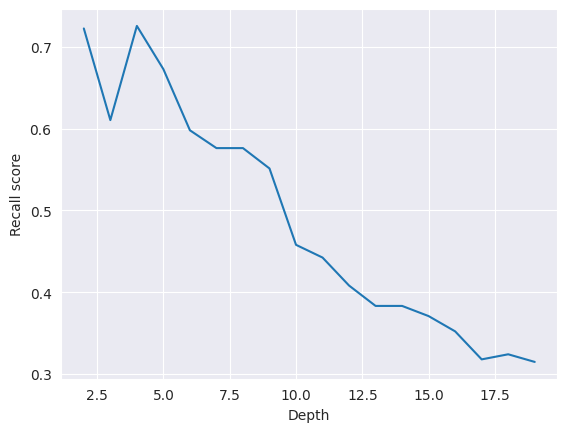

In [ ]:
#@title відображення оптимальної кількості "гілок"(глибина) дерева рішень до recall-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
recall_scores = []
for depth in range(2, 20):
  tree = DecisionTreeClassifier(max_depth=depth, random_state=2023, class_weight='balanced')
  tree.fit(X_train, y_train)
  y_pred = tree.predict(X_test)
  recall_scores.append(recall_score(y_test, y_pred))

plt.plot(range(2, 20), recall_scores)
plt.xlabel('Depth')
plt.ylabel('Recall score')
plt.show()

видно по графіку що найкраще число 4

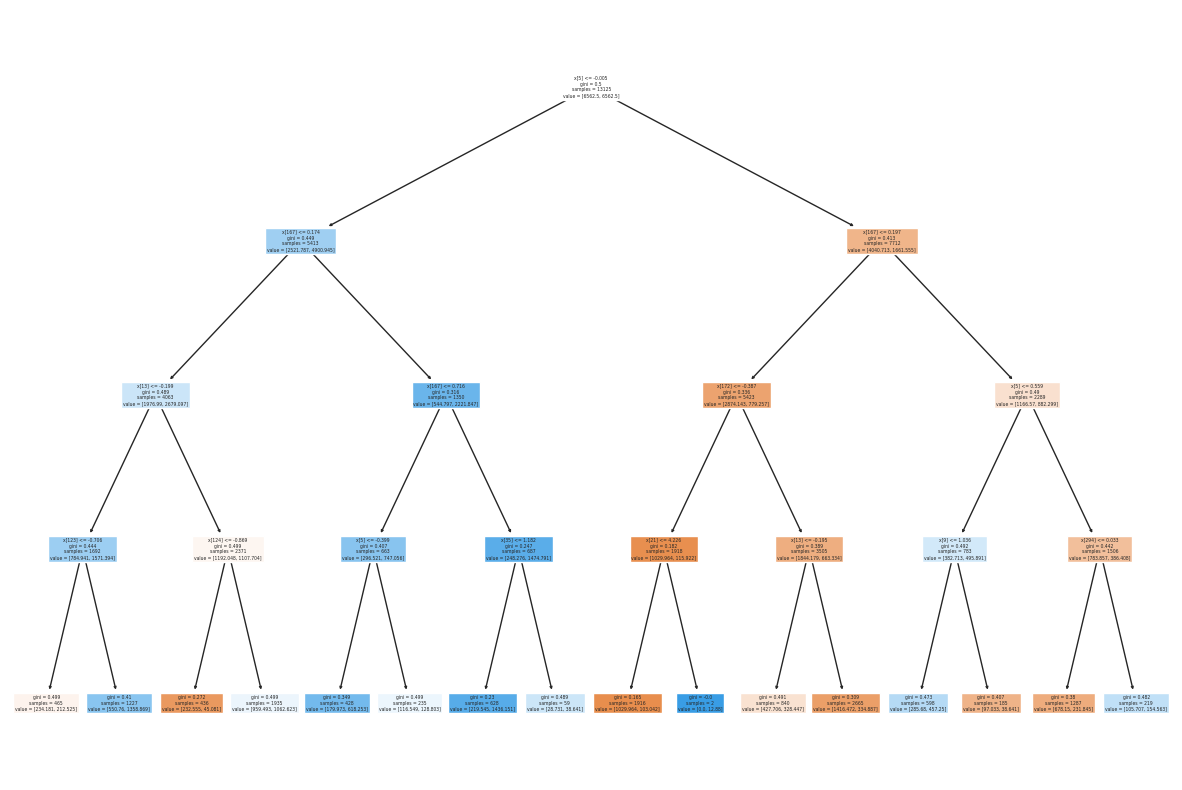

In [ ]:
#@title plot_tree
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(tree,
          filled=True)
plt.show()

На візуалізації дерева рішень видно га гілці, що зліва досить високий коефіціент невизначенності(gini), справа він менший - можна сказати, що зліва в нас позитивні значення, з якими є більша проблема в визначенні.

# Побудова моделі за допомогою RandomForest

In [ ]:
#@title RandomForest
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=2, max_depth=10, random_state=2023, class_weight='balanced')
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      4054
           1       0.15      0.29      0.20       321

    accuracy                           0.83      4375
   macro avg       0.54      0.58      0.55      4375
weighted avg       0.88      0.83      0.85      4375



In [ ]:
pd.DataFrame(confusion_matrix(y_test, y_pred),
             index=['True_0', 'True_1'],
             columns=['Pred_0', 'Pred_1'])

Pred_0  Pred_1
True_0    3635     419
True_1     258      63

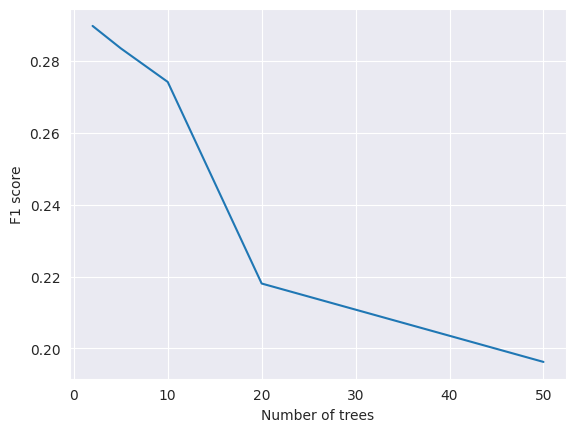

In [ ]:
recall_scores = []
for n_est in [2, 5, 10, 20, 50]:
  forest = RandomForestClassifier(n_estimators=n_est, max_depth=10, random_state=2023, n_jobs=-1, class_weight='balanced')
  forest.fit(X_train, y_train)
  y_pred = forest.predict(X_test)
  recall_scores.append(recall_score(y_test, y_pred))

plt.plot([2, 5, 10, 20, 50], recall_scores)
plt.xlabel('Number of trees')
plt.ylabel('F1 score')
plt.show()

Дізнався кількість дерев для кращого показника recall_score - 5 дерев

## Побудова моделі за допомогою XGBClassifier

In [ ]:
#@title XGBClassifier
import xgboost as xgb
from xgboost import XGBClassifier
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4054
           1       0.44      0.09      0.15       321

    accuracy                           0.92      4375
   macro avg       0.69      0.54      0.56      4375
weighted avg       0.90      0.92      0.90      4375



In [ ]:
pd.DataFrame(confusion_matrix(y_test, y_pred),
             index=['True_0', 'True_1'],
             columns=['Pred_0', 'Pred_1'])

Pred_0  Pred_1
True_0    4017      37
True_1     292      29

Модель виявила тільки 29 абонентів

## Побудова моделі за допомогою ансамблю VotingClassifier

In [ ]:
#@title VotingClassifier
from sklearn.ensemble import VotingClassifier
model1 = DecisionTreeClassifier(max_depth=4, random_state=2023, class_weight='balanced')
model2 = LogisticRegression(max_iter=1000, random_state=2023, class_weight='balanced')
model3 = XGBClassifier()
model4 = RandomForestClassifier(n_estimators=2, max_depth=10, random_state=2023, n_jobs=-1, class_weight='balanced')
voting_model = VotingClassifier(estimators=[('dt', model1), ('lr', model2), ('xgb', model3),('rf', model4)])
voting_model.fit(X_train, y_train)
y_pred = voting_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      4054
           1       0.25      0.28      0.26       321

    accuracy                           0.88      4375
   macro avg       0.59      0.60      0.60      4375
weighted avg       0.89      0.88      0.89      4375



In [ ]:
pd.DataFrame(confusion_matrix(y_test, y_pred),
             index=['True_0', 'True_1'],
             columns=['Pred_0', 'Pred_1'])

Pred_0  Pred_1
True_0    3781     273
True_1     232      89

Виявлено правильно 89 абонентів

Результати прогнозування моделі вийшли непогані для класу 0, та малорезультативні для класу 1.Моя думка, що це наслідок нервіномірного розподілення классів і модель важко навчити розпізнавати класс, якщо кількість зустрічання його у вибірці даних мала.Про це нам також свідчать малі показники метрики recall.

# Спробую навчити моделі без ознак, у яких мала кореляція з цільовою групою

In [ ]:
corr_targ = corr[-1:]

In [ ]:
filtered_columns = []
for col in corr_targ:
    if any(corr_targ[col].abs() > 0.05):
        filtered_columns.append(col)

In [ ]:
len(filtered_columns)

25

In [ ]:
filtered_df = df[filtered_columns]

Створений датафрейм, відфільтрований по кореляції

# Повторю стандартизацію, розбиття на трейнові та тестові значення та навчання моделі на відфільтрованих даних по кореляції

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = filtered_df.drop('target', axis=1)
y = filtered_df['target']
X_st_f = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X = filtered_df.drop("target", axis=1)
y = filtered_df["target"]
X_train, X_test, y_train, y_test = train_test_split(X_st_f, y, test_size=0.25, random_state=2023)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000, random_state=2023, class_weight='balanced')
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.72      0.82      4054
           1       0.16      0.68      0.26       321

    accuracy                           0.71      4375
   macro avg       0.56      0.70      0.54      4375
weighted avg       0.91      0.71      0.78      4375



In [ ]:
pd.DataFrame(confusion_matrix(y_test, y_pred),
             index=['True_0', 'True_1'],
             columns=['Pred_0', 'Pred_1'])

Pred_0  Pred_1
True_0    2902    1152
True_1     104     217

Виявленно правильно 217 абонентів, які встановлять додадток

In [ ]:
tree = DecisionTreeClassifier(max_depth=4, random_state=2023, class_weight='balanced')
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.63      0.77      4054
           1       0.14      0.76      0.24       321

    accuracy                           0.64      4375
   macro avg       0.56      0.69      0.50      4375
weighted avg       0.91      0.64      0.73      4375



In [ ]:
pd.DataFrame(confusion_matrix(y_test, y_pred),
             index=['True_0', 'True_1'],
             columns=['Pred_0', 'Pred_1'])

Pred_0  Pred_1
True_0    2563    1491
True_1      78     243

247 абонентів виявило правильно

In [ ]:
forest = RandomForestClassifier(n_estimators=2, max_depth=10, random_state=2023, class_weight='balanced')
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      4054
           1       0.15      0.34      0.21       321

    accuracy                           0.81      4375
   macro avg       0.55      0.60      0.55      4375
weighted avg       0.88      0.81      0.84      4375



In [ ]:
pd.DataFrame(confusion_matrix(y_test, y_pred),
             index=['True_0', 'True_1'],
             columns=['Pred_0', 'Pred_1'])

Pred_0  Pred_1
True_0    3454     600
True_1     212     109

In [ ]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4054
           1       0.34      0.09      0.14       321

    accuracy                           0.92      4375
   macro avg       0.64      0.54      0.55      4375
weighted avg       0.89      0.92      0.90      4375



гірший результат

In [ ]:
pd.DataFrame(confusion_matrix(y_test, y_pred),
             index=['True_0', 'True_1'],
             columns=['Pred_0', 'Pred_1'])

Pred_0  Pred_1
True_0    3998      56
True_1     292      29

In [ ]:
model1 = DecisionTreeClassifier(max_depth=4, random_state=2023, class_weight='balanced')
model2 = LogisticRegression(max_iter=1000, random_state=2023, class_weight='balanced')
model3 = XGBClassifier()
model4 = RandomForestClassifier(n_estimators=2, max_depth=10, random_state=2023, n_jobs=-1, class_weight='balanced')
voting_model = VotingClassifier(estimators=[('dt', model1), ('lr', model2), ('xgb', model3),('rf', model4)])
voting_model.fit(X_train, y_train)
y_pred = voting_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      4054
           1       0.20      0.32      0.25       321

    accuracy                           0.86      4375
   macro avg       0.57      0.61      0.58      4375
weighted avg       0.89      0.86      0.87      4375



In [ ]:
pd.DataFrame(confusion_matrix(y_test, y_pred),
             index=['True_0', 'True_1'],
             columns=['Pred_0', 'Pred_1'])

Pred_0  Pred_1
True_0    3644     410
True_1     218     103

Після навчання моделей на відфільтрованих, по кореляції, даних - результат не покращився тільки для LogisticRegression, а в інших випадках погіршився.

# **Загальний висновок**
Я провів чистку даних, після чого проаналізував їх.Було виявленно залежності та здійснено опис цільової групи, яка встановить додаток:
підбивши підсумок з аназілу візуалізацій, можем описати абонента, який має більшу схильність до придбання та встановлення додатку Vodafone Music:
*   Абонент має повищені загальні витрати, особливо витрати на різноманітний контент(all_cost - загальні витрати)
*   Використання дорожчого контенту(content_cost - вартість контенту)
*   Використовує більшу кількість контенту(content_count - кількість контенту)
*   Не тримає гроші на рахунку(balance_sum)
*   Чим більший період являється абонентом, тим менш вірогідніше встановить додаток(LT)

Після аналізу було проведено навчання моделей прогнозування різними способами.Через нерівномірний розподіл класів в наших даних, тобто випадків про абонентів  що встановлять додаток - досить мало, в порівнянні з іншим классом.
 Найкращий показник показала модель - дерево рішень, виявленно 233 позитивних випадків та 247 після видалення найменш корельованих ознак. Для покращення результатів необхідно зібрати більшу кількість позитивних випадків.

